# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
* dataset - mall customers gathered by mall company
* NO dependent variable in K-Means Clustering Model

> NO y needed ! 

> x - 'Annual Income' , 'Spending Score'

In [9]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# x - 'Annual Income','Spending Score'
x = dataset.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Using the elbow method to find the optimal number of clusters
* Elbow method
> plots a graph between the number of clusters K and the cost function. The ‘bend’ in the cost curve can suggest a natural value for K. Note that this feature may not exist or be significant in some data sets.

* Optimal number by Elbow method - 5

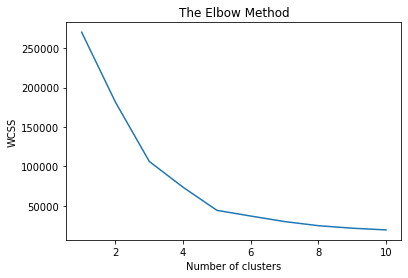

In [27]:
from sklearn.cluster import KMeans

# wcss : Within Cluster Sum of Squares
wcss = []

# want to try num of cluster 1 to 10ㅍ
# find the optimal(best) number of cluster
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # train the kmeans algorithms
    kmeans.fit(x)
    
    # add to list
    # inertia_ : Sum of Squares Within
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset
* fit_predict()
> only avilable in K-Means Algorithm NOT in Classification, Regression model

In [36]:
# Optimal number by Elbow method = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

# fit_predict() : perforem train the data and then do prediction 
y_kmeans = kmeans.fit_predict(x)

## Visualising the clusters
* Visualize the cluster 0 to 4 

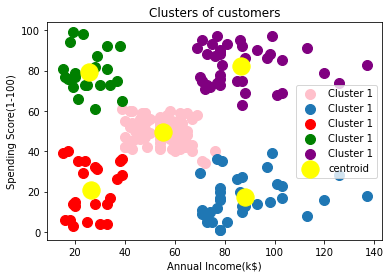

In [56]:
# x[y_kmeans == 0,0] : 'annual income'
# x[y_kmeans == 0,1] : 'spending score'
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], color = 'pink', s = 100, label='Cluster 1')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 100, label='Cluster 1')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], color = 'red', s = 100, label='Cluster 1')
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], color = 'green', s = 100, label='Cluster 1')
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], color = 'purple', s = 100, label='Cluster 1')

# find the centroid for each clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c='yellow', label ='centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()

plt.show()